In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# Load the Titanic dataset

titanic_data = pd.read_csv('titanic.csv')

In [22]:


display(titanic_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

In [23]:
display(titanic_data.describe())  

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [24]:
display(titanic_data.head()) 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
# Check for missing values

print(titanic_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [27]:
#Fill Missing Values in 'Age' with the Median:

titanic_data['Age'].fillna(titanic_data['Age'].median(),inplace = True)

In [28]:
# Fill missing value in 'Fare' with the median fare

titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

In [29]:
# Drop 'Cabin' due to too many missing values

titanic_data.drop(columns = ['Cabin'] , inplace = True)

In [30]:
# Verify missing values are handled

display(titanic_data.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Exploratory Data Analysis (EDA)

### a. Survival Rate by Gender

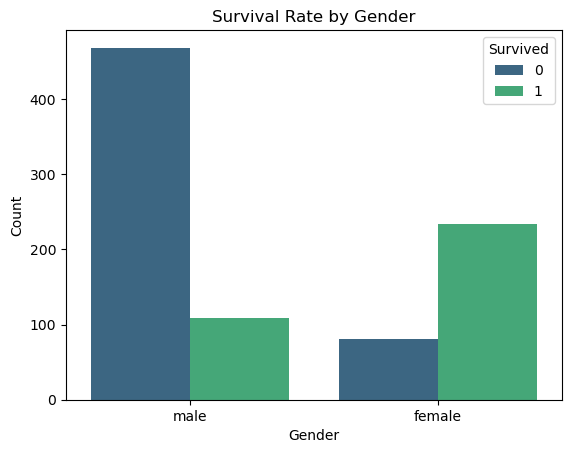

In [31]:
sns.countplot(data=titanic_data, x='Sex', hue= 'Survived' , palette='viridis')
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

#### Females had a significantly higher survival rate compared to males.

### b. Survival Rate by Passenger Class

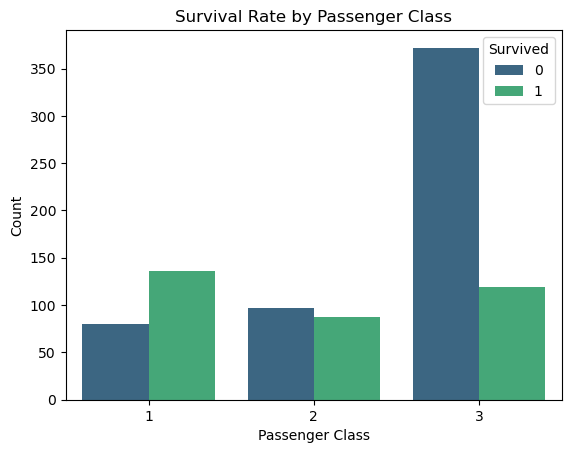

In [32]:
# Survival rate by passenger class
sns.countplot(data=titanic_data, x='Pclass', hue='Survived', palette='viridis')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

#### Passengers in 1st class had a better survival rate compared to those in 2nd and 3rd class.

### c. Age Distribution by Survival


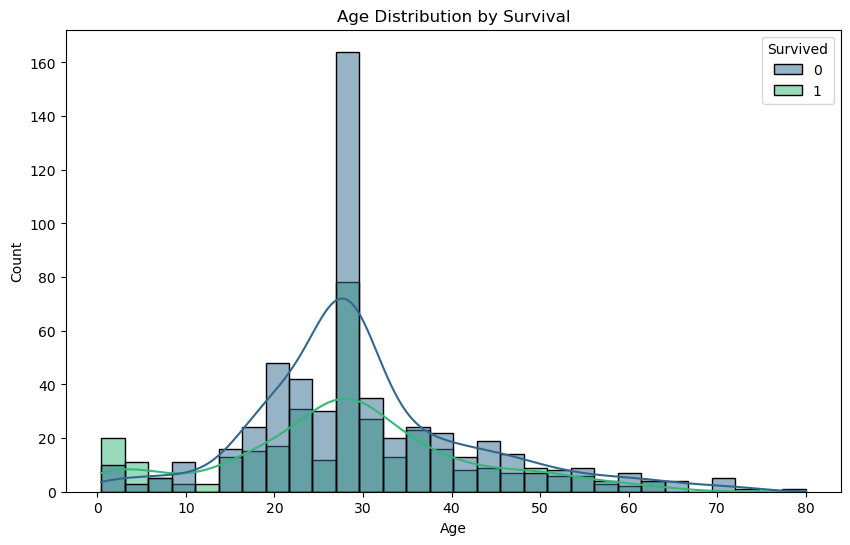

In [33]:
plt.figure(figsize=(10,6))
sns.histplot(data=titanic_data, x='Age', hue='Survived', kde=True, palette='viridis')
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

#### Children and younger passengers seem to have had a higher chance of survival

### d. Fare Distribution by Survival

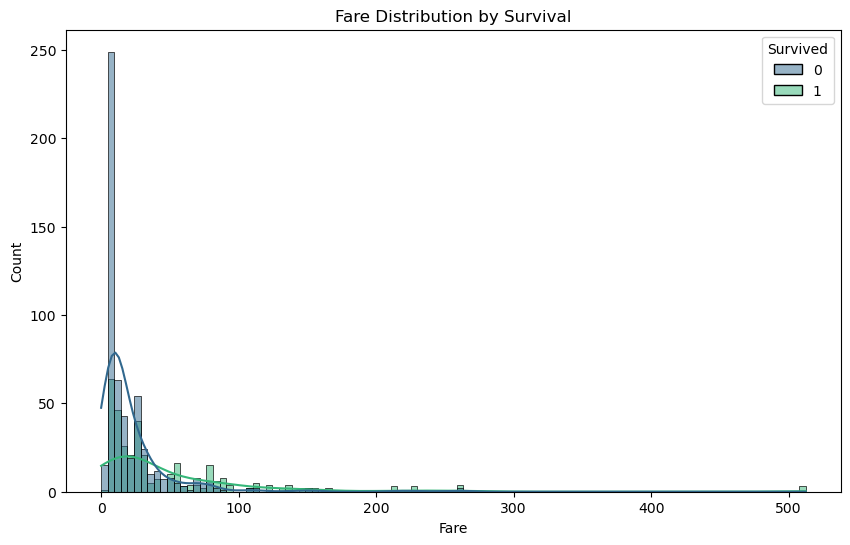

In [34]:
plt.figure(figsize=(10,6))
sns.histplot(data=titanic_data, x='Fare', hue='Survived', kde=True, palette='viridis')
plt.title('Fare Distribution by Survival')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()


#### Passengers who paid higher fares (likely 1st class) had a higher survival rate

### e. Embarked Port and Survival

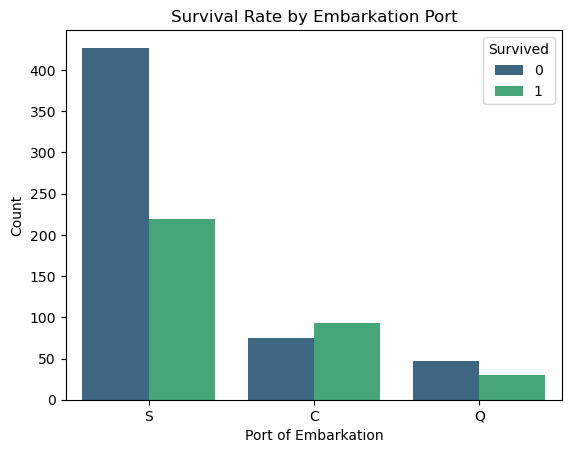

In [35]:
sns.countplot(data=titanic_data, x='Embarked', hue='Survived', palette='viridis')
plt.title('Survival Rate by Embarkation Port')
plt.xlabel('Port of Embarkation')
plt.ylabel('Count')
plt.show()


#### Passengers embarking from Cherbourg had the highest survival rate compared to other ports